In [238]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')

In [239]:
data_2 = pd.read_csv('../output/video_csi.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()

,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,Subcar_9,Subcar_10,...,Subcar_44,Subcar_45,Subcar_46,Subcar_47,Subcar_48,Subcar_49,Subcar_50,Subcar_51,Subcar_52,Label
0,197.022841,222.611770,298.824363,345.092741,386.865610,460.408514,507.410091,658.663040,709.626662,761.396743,...,598.792952,571.161098,556.400036,553.971118,578.993091,620.966988,658.089660,693.333974,725.385415,1
1,185.180993,203.246156,225.375243,265.685905,326.585364,376.017287,418.951071,513.857957,567.275947,621.003221,...,465.288083,456.508488,458.216106,460.214081,474.090709,505.929837,531.919167,516.980657,505.831988,1
2,275.181758,254.880364,246.032518,278.411566,311.770749,356.561355,411.325905,531.372751,588.210847,623.682612,...,487.155006,470.227604,458.851828,454.059467,481.814280,515.873046,549.615320,564.156007,571.360657,1
3,223.329353,242.441746,290.800619,331.798131,390.988491,458.039300,514.008755,641.891735,715.690576,783.649156,...,571.686103,561.663600,547.153543,548.426841,577.257308,609.407089,652.345001,700.668966,744.492445,1
4,144.474911,180.709712,233.790504,284.541737,331.581061,381.693594,451.707870,608.240084,680.307284,738.823389,...,509.039291,510.309710,487.689450,504.239031,534.344458,586.291736,620.220122,661.725774,706.785682,1


In [240]:
X_data = data_2.iloc[:, :-1]
target = data_2.iloc[:, -1]

In [241]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('x_train.shape: ', x_train.shape)
print('x_valid.shape: ', x_valid.shape)
print('y_train.shape: ', y_train.shape)
print('y_valid.shape: ', y_valid.shape)

x_train.shape:  (24628, 52)
x_valid.shape:  (6158, 52)
y_train.shape:  (24628,)
y_valid.shape:  (6158,)


In [242]:
x_valid, x_test, y_valid, y_test = train_test_split(
    x_valid, y_valid,  test_size=0.50, random_state=120, shuffle=False)  # false for timeseries
print('x_valid.shape: ', x_valid.shape)
print('y_valid.shape: ', y_valid.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_valid.shape:  (3079, 52)
y_valid.shape:  (3079,)
x_test.shape:  (3079, 52)
y_test.shape:  (3079,)


In [243]:
# Scaling
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)

[[ 0.51093192  1.7279053   2.6273626  ...  1.04434466  1.06860346
   1.08827168]
 [ 0.46519492  1.53351118  1.85697108 ...  0.7260322   0.64027144
   0.57304334]
 [ 0.81280658  2.05182094  2.07364066 ...  0.7706774   0.75485229
   0.72682016]
 ...
 [-0.24762449 -0.50002294 -0.50241522 ... -0.61949478 -0.61871445
  -0.6166865 ]
 [-0.24606654 -0.49859264 -0.49964486 ... -0.61590547 -0.61382749
  -0.61211423]
 [-0.2480173  -0.50046342 -0.49903317 ... -0.61942006 -0.61890961
  -0.61677419]]


In [244]:
x_test_scaled = standardizer.transform(x_test)
x_test_scaled

array([[-0.25096961, -0.50971912, -0.51013568, ..., -0.61538404,
        -0.61478324, -0.61358149],
       [-0.25047042, -0.50780837, -0.50815553, ..., -0.61564318,
        -0.61498584, -0.61423769],
       [-0.24746111, -0.50012822, -0.50020797, ..., -0.61709064,
        -0.61590166, -0.61372841],
       ...,
       [-0.24762449, -0.50002294, -0.50241522, ..., -0.61949478,
        -0.61871445, -0.6166865 ],
       [-0.24606654, -0.49859264, -0.49964486, ..., -0.61590547,
        -0.61382749, -0.61211423],
       [-0.2480173 , -0.50046342, -0.49903317, ..., -0.61942006,
        -0.61890961, -0.61677419]])

In [245]:
x_train = x_train.values.reshape(24628, 52, 1)
x_valid = x_valid.values.reshape(3079, 52, 1)
x_test = x_test.values.reshape(3079, 52, 1)
print('X_train.shape: ', x_train.shape)
print('x_valid.shape: ', x_valid.shape)
print('x_test.shape: ', x_test.shape)

X_train.shape:  (24628, 52, 1)
x_valid.shape:  (3079, 52, 1)
x_test.shape:  (3079, 52, 1)


In [246]:
# Set up parameters
n_steps = 64
n_features = 1

tf.random.set_seed(2)
# Create a traditional RNN network
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        128, input_shape=(n_steps, n_features), return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [247]:
cp1 = ModelCheckpoint('../save/bi_csimodel/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
])

In [248]:
history_1 = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=100, batch_size=300, callbacks=[early_stopping, cp1])

Epoch 1/100
83/83 [==============================] - 193s 2s/step - loss: 0.8109 - accuracy: 0.7494 - precision: 0.8082 - recall: 0.7391 - val_loss: 0.7757 - val_accuracy: 0.6898 - val_precision: 0.2712 - val_recall: 0.6734
Epoch 2/100
83/83 [==============================] - 234s 3s/step - loss: 0.5076 - accuracy: 0.7974 - precision: 0.8548 - recall: 0.7798 - val_loss: 0.6893 - val_accuracy: 0.7103 - val_precision: 0.2926 - val_recall: 0.7025
Epoch 3/100
83/83 [==============================] - 241s 3s/step - loss: 0.4047 - accuracy: 0.8303 - precision: 0.8830 - recall: 0.8121 - val_loss: 0.6468 - val_accuracy: 0.7467 - val_precision: 0.3353 - val_recall: 0.7584
Epoch 4/100
83/83 [==============================] - 251s 3s/step - loss: 0.3710 - accuracy: 0.8401 - precision: 0.8869 - recall: 0.8272 - val_loss: 0.6456 - val_accuracy: 0.7262 - val_precision: 0.3223 - val_recall: 0.8031
Epoch 5/100
83/83 [==============================] - 233s 3s/step - loss: 0.3431 - accuracy: 0.8532 - pr

In [249]:
best_score = max(history_1.history['accuracy'])
print(best_score)

0.8755481839179993


In [250]:
history_1.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [251]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

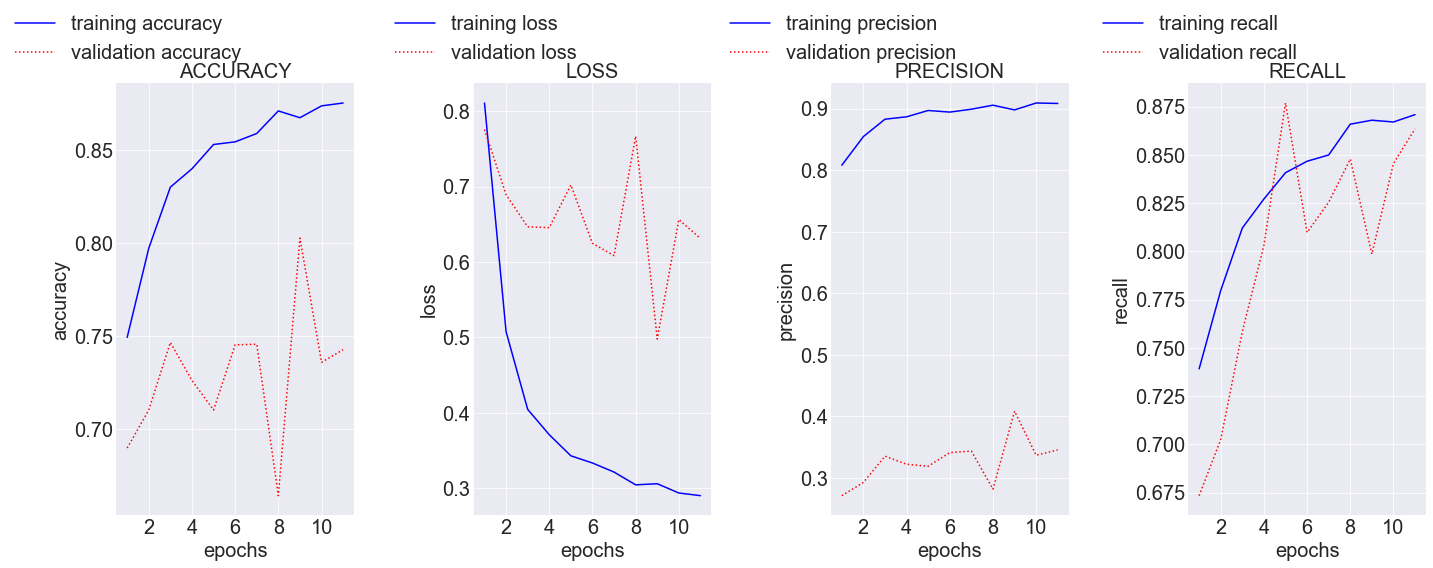

In [252]:
plot_history(history_1)

In [253]:
y_pred = model.predict(x_test, verbose=0)
y_pred


array([[0.39809638],
       [0.10735214],
       [0.9876322 ],
       ...,
       [0.83878607],
       [0.90758455],
       [0.98817855]], dtype=float32)

No handles with labels found to put in legend.


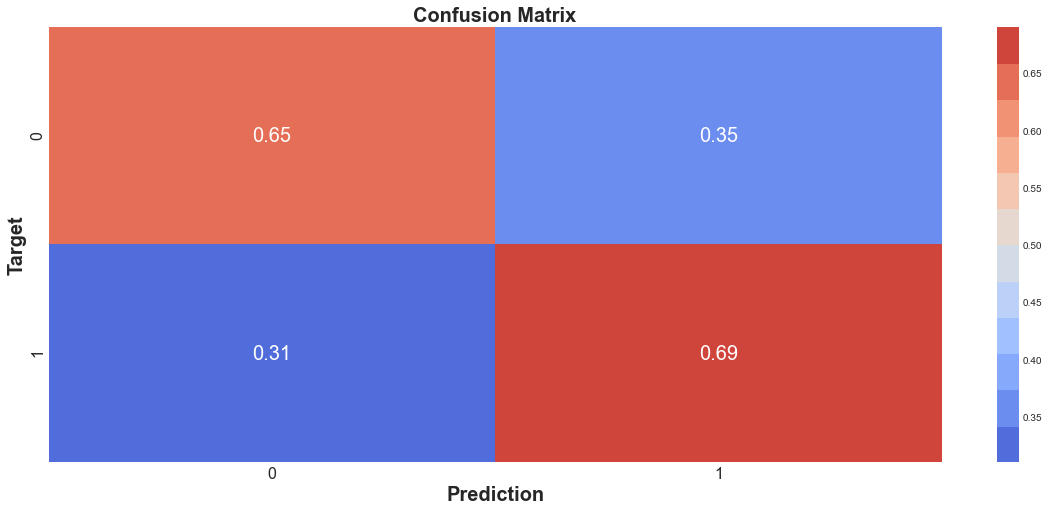

In [254]:
cm = confusion_matrix(y_test, y_pred.round())
cm = np.around(cm.astype(
    'float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


In [255]:
tf.random.set_seed(2)
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(
        n_steps, n_features), return_sequences=True),
    tf.keras.layers.SimpleRNN(52, 'relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, 'sigmoid')
])


In [256]:
cp2 = ModelCheckpoint('../save/gru_csimodel/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)

gru_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [257]:
history_2 = gru_model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=50, batch_size=300, callbacks=[early_stopping, cp2])

Epoch 1/50
83/83 [==============================] - ETA: 0s - loss: 1.0064 - accuracy: 0.6773 - precision: 0.8197 - recall: 0.5618WARNING:tensorflow:Model was constructed with shape (None, 64, 1) for input Tensor("gru_4_input:0", shape=(None, 64, 1), dtype=float32), but it was called on an input with incompatible shape (None, 52, 1).
INFO:tensorflow:Assets written to: ../save/gru_csimodel\assets
83/83 [==============================] - 61s 737ms/step - loss: 1.0064 - accuracy: 0.6773 - precision: 0.8197 - recall: 0.5618 - val_loss: 0.8689 - val_accuracy: 0.7704 - val_precision: 0.2347 - val_recall: 0.2573
Epoch 2/50
83/83 [==============================] - 52s 625ms/step - loss: 0.6999 - accuracy: 0.7097 - precision: 0.7835 - recall: 0.6836 - val_loss: 0.6592 - val_accuracy: 0.7074 - val_precision: 0.2191 - val_recall: 0.3960
Epoch 3/50
83/83 [==============================] - 52s 626ms/step - loss: 0.5975 - accuracy: 0.7323 - precision: 0.7884 - recall: 0.7299 - val_loss: 0.6232 - val

In [258]:
best_score = max(history_2.history['accuracy'])
print(best_score)

0.8077391386032104


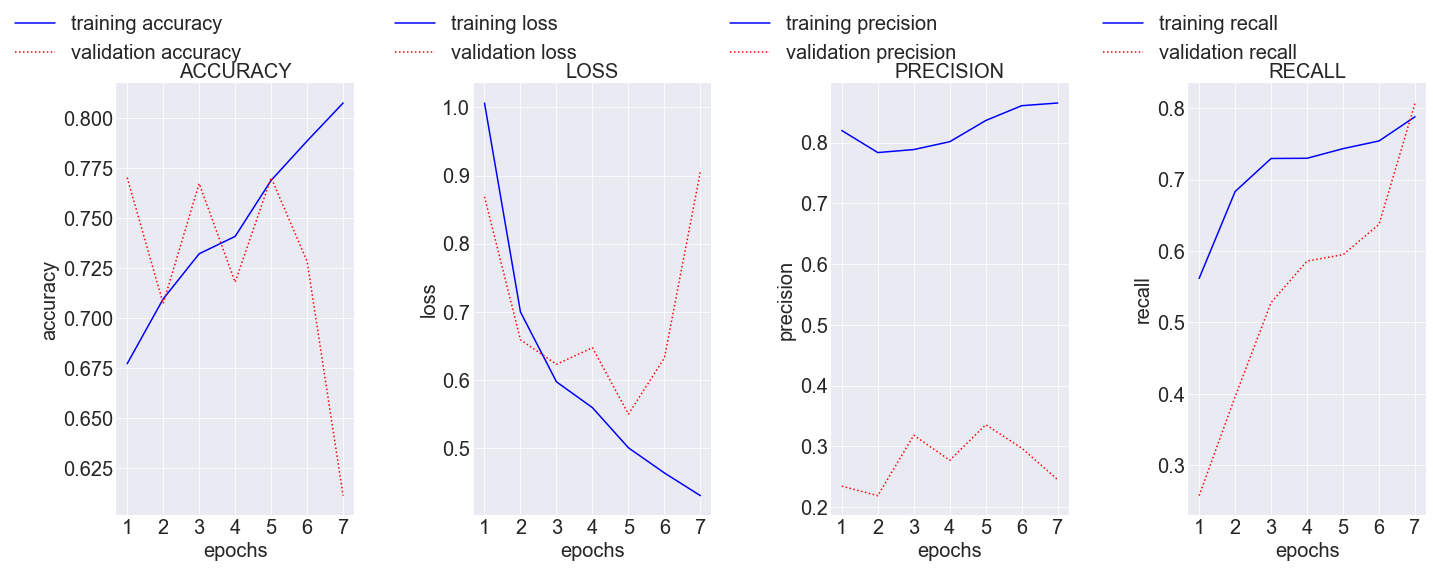

In [259]:
plot_history(history_2)


In [260]:
y_pred_2 = gru_model.predict(x_test, verbose=0)
y_pred_2


array([[0.5326965 ],
       [0.40821242],
       [0.989071  ],
       ...,
       [0.9031992 ],
       [0.9304509 ],
       [0.92397857]], dtype=float32)

No handles with labels found to put in legend.


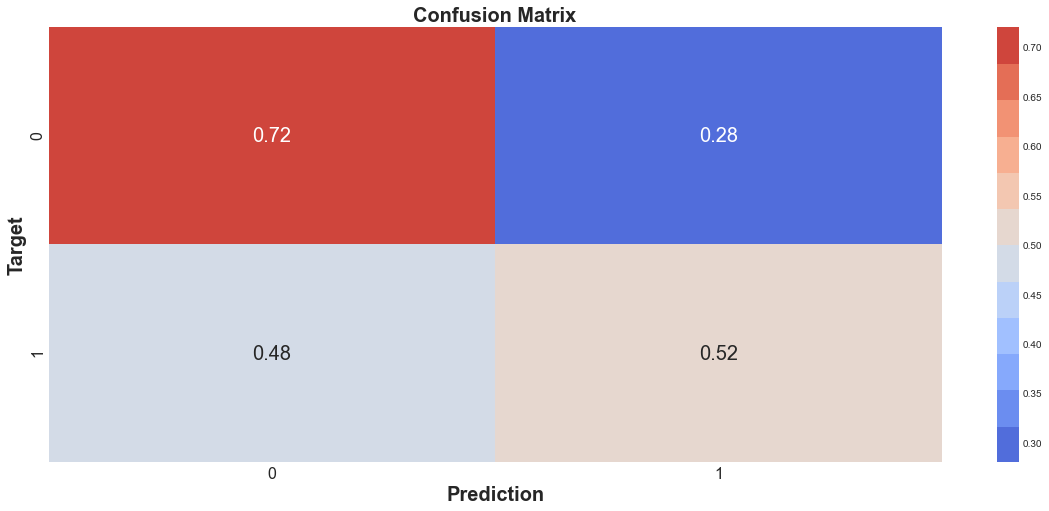

In [261]:
cm = confusion_matrix(y_test, y_pred_2.round())
cm = np.around(cm.astype(
    'float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
plt.figure()
colormap = sns.color_palette("coolwarm", 12)
sns.heatmap(cm, cmap=colormap, annot=True, annot_kws={"size": 20})
plt.xlabel('Prediction', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.ylabel('Target', fontsize=20, fontweight='bold',
           horizontalalignment='center')
plt.title('Confusion Matrix', fontsize=20, fontweight='bold',
          horizontalalignment='center')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)


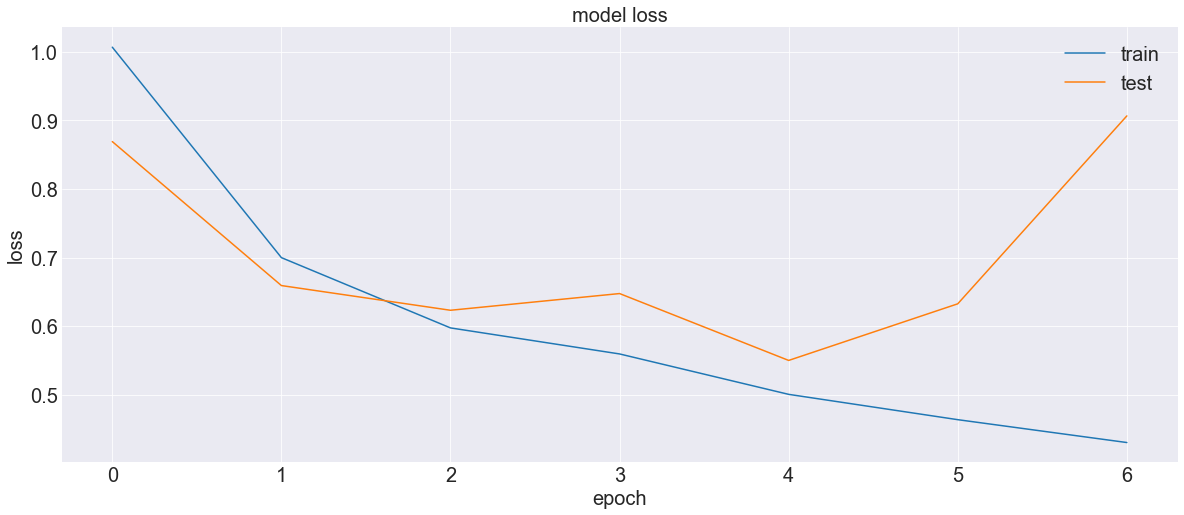

In [262]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'test'], loc='upper right', fontsize=20)
plt.show()


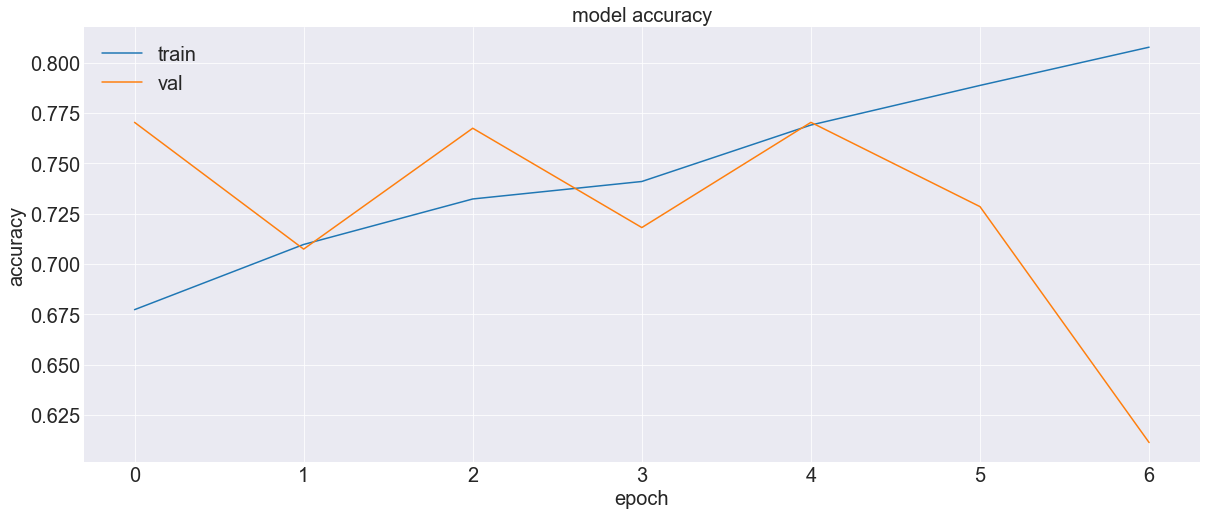

In [263]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy',  fontsize=20)
plt.ylabel('accuracy', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(['train', 'val'], loc='upper left', fontsize=20)
plt.show()
